In [1]:
import pandas as pd
import os
import glob
import seaborn as sns
import matplotlib.pyplot as plt

# Benign

## 4 folds using 80%

In [45]:
df_unet_24 = pd.read_csv("./../runs/20230224_093327_UNet_24/results.csv")
df_unet_24["architecture"] = "Unet 24"

# df_unet_48 = pd.read_csv("./../runs/20230224_094641_UNet_48/results.csv")
# df_unet_48["architecture"] = "Unet 48"

df_vnet_24 = pd.read_csv("./../runs/20230224_100317_VNet24/results.csv")
df_vnet_24["architecture"] = "Vnet 24"

# df_vnet_48 = pd.read_csv("./../runs/20230224_101604_VNet_48/results.csv")
# df_vnet_48["architecture"] = "Vnet 48"

df_SegResNet_24 = pd.read_csv("./../runs/20230224_113332_SegResNet_24/results.csv")
df_SegResNet_24["architecture"] = "SegResNet 24"

# df_SegResNet_48 = pd.read_csv("./../runs/20230224_104752_SegResNet_48/results.csv")
# df_SegResNet_48["architecture"] = "SegResNet 48"

df_BTS_UNet_24 = pd.read_csv("./../runs/20230225_213835_BTS_UNet/results.csv")
df_BTS_UNet_24["architecture"] = "BTS_UNet 24"

df_BTS_FSB_UNet_24 = pd.read_csv("./../runs/20230225_215806_BTS_FSB/results.csv")
df_BTS_FSB_UNet_24["architecture"] = "BTS_FSB_UNet 24"


df = pd.concat([df_unet_24, df_vnet_24, df_SegResNet_24, df_BTS_UNet_24, df_BTS_FSB_UNet_24])
df = df[['architecture', 'Jaccard index', 'Precision', 'Sensitivity', 'Specificity', 'DICE']]
df

,architecture,Jaccard index,Precision,Sensitivity,Specificity,DICE
0,Unet 24,0.368000,0.384937,0.893204,0.990971,0.538012
1,Unet 24,0.866995,0.941176,0.916667,0.999321,0.928760
2,Unet 24,0.640566,0.974175,0.651631,0.995927,0.780909
3,Unet 24,0.574468,0.638298,0.851735,0.990477,0.729730
4,Unet 24,0.890909,0.907407,0.980000,0.999076,0.942308
...,...,...,...,...,...,...
60,BTS_FSB_UNet 24,0.738849,0.889732,0.813324,0.945292,0.849814
61,BTS_FSB_UNet 24,0.524345,0.542636,0.939597,0.977788,0.687961
62,BTS_FSB_UNet 24,0.626928,0.984581,0.633144,0.999554,0.770690
63,BTS_FSB_UNet 24,0.581784,0.934328,0.606589,0.997134,0.735605


In [46]:
results = 100 *df.groupby(["architecture"]).mean()
results = results.reset_index()
results

,architecture,Jaccard index,Precision,Sensitivity,Specificity,DICE
0,BTS_FSB_UNet 24,72.127647,85.167723,82.639084,98.178302,81.555216
1,BTS_UNet 24,71.345627,83.283203,82.521456,97.894900,80.198778
2,SegResNet 24,67.122538,77.873595,85.955963,96.734445,77.274404
3,Unet 24,59.619926,75.377300,75.955144,96.460918,71.679944
4,Vnet 24,32.354343,55.096170,71.630574,95.563926,44.431245


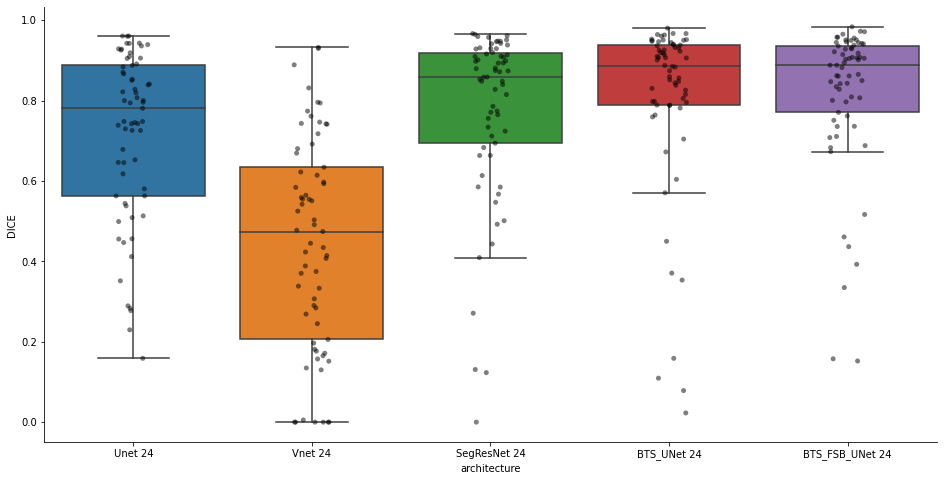

In [48]:
fig = plt.figure(figsize=(16, 8))
sns.boxplot(data=df, x="architecture", y="DICE", showfliers=False)
sns.stripplot(data=df, x="architecture", y="DICE", color='black', alpha=.5)
sns.despine()
plt.show()